Mistakes is the list of turns with mistakes: 

For example given [0,0,0,1,1,1]

means that we have 3 mistakes at turn 0 and 3 mistakes at turn 1.
N is the number of turns.

Turns is the list of number of mistakes for each turn:

For example given [3,0,0]
means that the first turn has 3 mistakes, where the second and third have no mistakes.

In [16]:
from scipy import mean, std
from src.gca import compute_gca
from src.compute_accuracies import loadJson,getModelAccuracy
import os
import json
import pandas as pd
from collections import defaultdict
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import math
'''
Pearson median skewness of each dialogue
mean is the average turn of a mistake (W,MS,OS).
median is the turn count halved
std is the std of turns of mistakes
'''
# THRESHOLD = 0.01
def skew(mistakes, N):#right_skewness
    print(mistakes)
    if not mistakes:
        return 0
    mean_turn = mean(mistakes)
    half_turn = (N-1)/2 # Changed from (N-1)/2
    # std_turn = std(mistakes)
    if (mean_turn - half_turn) == 0:
        return 0
    result = (mean_turn - half_turn) / (N)
    return result

def skew2(mistakes, N):
    if not mistakes:
        return 0
        
    penalty = 0

    for mistake in mistakes:
        penalty += N-mistake

    return penalty/ (len(mistakes))

skew_funcs = [skew]
for skew_func in skew_funcs:
    print (skew_func([0,0,0,1,1,1],6))
    print (skew_func([0,0,0,0,0,0],6))
    print (skew_func([6,6,6,6,6,6],6))
    print (skew_func([0,1,2,3,4,5],6))
    print (skew_func([4,4,4,5,5,5],6))

    print (skew_func([0,0,5,5],6))

    print (skew_func([0,0,1,1,5],6))
    print (skew_func([0,0,1,1,4],6))

    print(skew_func([0,1,1],4))
    print(skew_func([2,2,3],4))

[0, 0, 0, 1, 1, 1]
-0.3333333333333333
[0, 0, 0, 0, 0, 0]
-0.4166666666666667
[6, 6, 6, 6, 6, 6]
0.5833333333333334
[0, 1, 2, 3, 4, 5]
0
[4, 4, 4, 5, 5, 5]
0.3333333333333333
[0, 0, 5, 5]
0
[0, 0, 1, 1, 5]
-0.18333333333333335
[0, 0, 1, 1, 4]
-0.21666666666666667
[0, 1, 1]
-0.20833333333333334
[2, 2, 3]
0.20833333333333337


/var/folders/tt/89b_9ttj1mb31b1w03hc4t_40000gn/T/ipykernel_38304/533278380.py:23: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  mean_turn = mean(mistakes)


In [17]:
'''
Chi square for uniformness of mistakes
sum_i(frac { O_i - (number of mistakes / turn number)} { (number of mistakes / turn number)})
O_i number of mistakes in that particular turn
'''
def chi(turns):
    # print(turns)
    if len(turns) == 0:
        return 0
    sum_chi = 0
    N = len(turns)
    for turn in turns:
        sum_chi += abs((turn - (sum(turns) / N)))
    if sum(turns) == 0:
        return 0
    return sum_chi/(sum(turns) / N)
print(chi([1,1,1,1,1]))
print (chi([4,0,0,0]))
print (chi([1,1,1,1]))

print (chi([3,3,0,0,0,0]))
print (chi([1,1,1,1,1,1]))
print (chi([0,0,0,0,3,3]))

print (chi([5,1,1,1]))
print (chi([2,2,2,2]))

print(chi([4,0,0]))
print(chi([1,1,1]))
print(chi([0]))

def turns2mistakes(turns):
    # [3,2,0,0,0,0] --> [0,0,0,1,1]
    mistakes = []
    for i,turn in enumerate(turns):
        for j in range(turn):
            mistakes.append(i)
    return mistakes
    
# print(turns2mistakes([3,2,0,0,0,0]))
    

0.0
6.0
0.0
8.0
0.0
8.0
3.0
0.0
4.0
0.0
0


In [18]:
# For each dialogue in trade_result.json find FGA and my_metric.
mr_dict = {}
def get_results(folder_name):
    eval_file_dir = os.listdir(os.path.join("..","data",folder_name))

    for i,file in enumerate(eval_file_dir):
        _, FGA_dict = getModelAccuracy(os.path.join("..","data",folder_name,file))

        data = json.load(open(os.path.join("..","data",folder_name,file),'r'))
        _, my_metric_dict,all_dial_mrs, mr = compute_gca(data)

    mr_dict[folder_name] = all_dial_mrs 
    FGA_dict = { k:v[2] for k,v in FGA_dict.items()}
    my_metric_dict = {k:round(v*100.0,2) for k,v in my_metric_dict.items() }
    all_metrics = {i: {"dial_key": k, "fga": FGA_dict[k], "my_metric": my_metric_dict[k], "model":folder_name} for i,k in enumerate(FGA_dict.keys())}
    
    return all_metrics

dialog_data_file = os.path.join("..","data","data.json")

all_metrics_trade = get_results("trade")
all_metrics_somdst = get_results("som-dst")

Joint Acc = 48.87,            Slot Acc = 96.97,            Avg. Goal Acc = 88.81,            Improved Avg. Goal Acc = 83.8,            Relative Slot Acc = 83.87
FGA with L=0.25 : 56.62
FGA with L=0.5 : 61.23
FGA with L=0.75 : 64.21
FGA with L=1.0 : 66.22
Joint Acc = 53.09,            Slot Acc = 97.36,            Avg. Goal Acc = 91.71,            Improved Avg. Goal Acc = 86.77,            Relative Slot Acc = 86.91
FGA with L=0.25 : 64.94
FGA with L=0.5 : 71.04
FGA with L=0.75 : 74.61
FGA with L=1.0 : 76.88


In [19]:
data1 = json.load(open(os.path.join("..","data","trade","trade_result.json"),"r"))
data2 = json.load(open(os.path.join("..","data","som-dst","som-dst_result.json"),"r"))
test_data = json.load(open(os.path.join("..","data","test_dials.json"),"r"))
test_data = {test_data[i]["dial_id"]:test_data[i] for i in range(len(test_data))}

mr_dict = {}
def get_results(file_name,dialog_data):

    print(os.path.join("data",file_name))
    result_dict,FGA_dict = getModelAccuracy(os.path.join("..","data",file_name))

    data = json.load(open(os.path.join("..","data",file_name),'r'))
    _,my_metric_dict,all_dial_mrs, mr = compute_gca(data)

    mr_dict[file_name] = all_dial_mrs 
    FGA_dict = { k:v[2] for k,v in FGA_dict.items()}
    my_metric_dict = {k:round(v*100.0,2) for k,v in my_metric_dict.items() }
    all_metrics = {i: {"dial_key": k, 
                       "fga": FGA_dict[k], 
                       "gca": my_metric_dict[k], 
                       "model":f"{file_name}"} for i,k in enumerate(FGA_dict.keys())}
    
    return all_metrics

dialog_data_file = os.path.join("..","data",'data.json')
dialog_data = loadJson(dialog_data_file)


# Walk through the folder and its subdirectories
# folder_path = os.path.join("..","data",'T5_fewshot_train')  # Replace with the actual folder path
# df = pd.DataFrame()
# for root, dirs, files in os.walk(folder_path):
#     for file in files:
#         all_metrics_taxi = get_results(os.path.join(folder_path,file),dialog_data)
#         df1 = pd.DataFrame.from_dict(all_metrics_taxi, orient="index")
#         df = df.append(df1)

all_metrics_trade = get_results("trade/trade_result.json",dialog_data)
all_metrics_somdst = get_results("som-dst/som-dst_result.json",dialog_data)
df1 = pd.DataFrame.from_dict(all_metrics_trade, orient="index")
df2 = pd.DataFrame.from_dict(all_metrics_somdst, orient="index")

df = df1.append(df2)



data/trade/trade_result.json
Joint Acc = 48.87,            Slot Acc = 96.97,            Avg. Goal Acc = 88.81,            Improved Avg. Goal Acc = 83.8,            Relative Slot Acc = 83.87
FGA with L=0.25 : 56.62
FGA with L=0.5 : 61.23
FGA with L=0.75 : 64.21
FGA with L=1.0 : 66.22
data/som-dst/som-dst_result.json
Joint Acc = 53.09,            Slot Acc = 97.36,            Avg. Goal Acc = 91.71,            Improved Avg. Goal Acc = 86.77,            Relative Slot Acc = 86.91
FGA with L=0.25 : 64.94
FGA with L=0.5 : 71.04
FGA with L=0.75 : 74.61
FGA with L=1.0 : 76.88


/var/folders/tt/89b_9ttj1mb31b1w03hc4t_40000gn/T/ipykernel_38304/2297386727.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df1.append(df2)


In [20]:
# print(mr_dict["trade/trade_result.json"]['MUL0003.json'].turn_mistakes)
print(mr_dict["trade/trade_result.json"]['MUL0003.json'])

Statistics for model @ none:
-------------------------------------------
Total number of predictions: -1
Total number of ground truth values: -1
Total number of wrong predictions: 1 (P: 0.76, R: 0.87, F1: -1.00)
Total number of correct predictions: 13 
Total number of missed labels: 1 (-1.00%)
Total number of over-predictions: 3 (-1.00%)
Label hit ratio: 0.78 
GCA: 0.81
-------------------------------------------


In [21]:
# Create a table with 4 columns: chi-metric, pearson-metric, fga, gca

# Filtering predictions which achieve perfect score.
df = df[ (df["gca"] != 100) | (df["fga"] != 100) ]

df["chi"] = df.apply(lambda row: chi(mr_dict[row.model][row.dial_key].turn_mistakes), axis=1)
df["skew"] = df.apply(lambda row: skew(turns2mistakes(mr_dict[row.model][row.dial_key].turn_mistakes),len(mr_dict[row.model][row.dial_key].turn_mistakes)+1), axis=1)

#Normalize with mean normalization all 4 measures and save up to 2 decimal places
cols_to_norm = ['chi','skew','fga','gca']
df[cols_to_norm] = df[cols_to_norm].apply(lambda x: round((x - x.mean()) / (x.std()),2))
df["dif"] = df.apply(lambda row: abs(row.fga-row.gca), axis=1)
df = df[df["dif"] >= 0.1]

df.head(10)
df.shape[0]

[2, 2, 2, 4, 6]
[4, 4, 6]
[3, 4, 5, 5, 8, 10, 10, 10, 11, 12]
[1, 2, 5, 5, 5]
[6, 6, 6, 7]
[0]
[3, 3, 3, 5, 6, 7]
[0, 4]
[1, 6, 7]
[2, 3, 4, 6, 8, 10]
[1, 4, 4, 5, 5]
[1, 1, 2, 9, 9, 10, 11, 11]
[5, 5, 7]
[1, 1, 1, 5, 5, 5, 8, 8, 8, 9, 11, 12]
[4]
[7, 8]
[0, 0, 1, 1, 1]
[1, 1, 2, 3, 3]
[1]
[1, 4, 6]
[5, 5, 6, 6]
[4, 5]
[4, 6, 8]
[3, 5, 5, 5, 5, 6]
[2, 4]
[0]
[0]
[1, 2, 6, 6, 7, 8]
[4, 6]
[2]
[3, 3]
[5]
[0, 1, 1, 3, 3, 3]
[3, 4, 5, 5, 6, 7]
[2, 5, 6, 6, 7, 7, 8]
[1, 2, 3, 3, 5, 5, 7]
[0, 1, 1, 1]
[1, 5]
[0, 3, 3, 4]
[4]
[4]
[3, 6, 8]
[3, 3, 4]
[0, 6, 7, 8, 8, 10, 11]
[3, 5]
[2, 2, 3, 4, 5, 6, 7, 7]
[2, 4, 4, 6, 6]
[1, 2, 3]
[3, 6]
[0, 4, 4, 6]
[2]
[0, 2, 3, 3]
[6]
[4]
[1, 3, 4, 5, 6]
[4, 5]
[3, 4, 5, 7]
[0, 4, 4]
[0, 1]
[0, 1, 7]
[1]
[3]
[0, 0, 3, 3, 7, 8]
[5]
[1, 3]
[2]
[0, 2, 3, 5, 7]
[6]
[2]
[7]
[3]
[2, 3]
[0, 0]
[2, 4, 4, 4]
[0, 2, 4, 5, 5, 5]
[2, 2, 3, 3, 4, 5, 5, 6, 7, 8]
[4]
[0, 1, 3, 3, 4, 6]
[7]
[2, 3]
[7]
[5, 5, 5, 7]
[2, 4, 5]
[0, 5, 5, 5, 6, 7, 7, 9, 10]
[3, 6, 6, 7, 7, 7]
[

/var/folders/tt/89b_9ttj1mb31b1w03hc4t_40000gn/T/ipykernel_38304/533278380.py:23: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  mean_turn = mean(mistakes)


1344

In [22]:
average_chi = df.groupby('model')['chi'].mean()
average_skew = df.groupby('model')['skew'].mean()
print(average_chi)
print(average_skew)

# Normalize chi and skew to be in 0-100 range

model
som-dst/som-dst_result.json    0.224373
trade/trade_result.json       -0.200346
Name: chi, dtype: float64
model
som-dst/som-dst_result.json   -0.185354
trade/trade_result.json        0.120693
Name: skew, dtype: float64


In [23]:
trial_dials = ["PMUL0204.json"]
for i,dial in enumerate(trial_dials):    
    
    # get gca score and fga score from data frame where dial_key == dial
    # if dial_key is not there print not found
    if dial not in df['dial_key'].values:
        print(f"{dial} not found")
        continue
    gca_score = df.loc[df['dial_key' ] == dial]['gca'].values[0]
    fga_score = df.loc[df['dial_key' ] == dial]['fga'].values[0]

    print("turns :", mr_dict["trade/trade_result.json"][dial].turn_mistakes)
    print("chi: ", chi(mr_dict["trade/trade_result.json"][dial].turn_mistakes))
    # print the max value of chi colymn in df
    print("max chi: ", df["chi"].max())
    print("gca:", gca_score)
    print("fga:", fga_score)

    print("mistakes: ", turns2mistakes(mr_dict["trade/trade_result.json"][dial].turn_mistakes))
    print("len turns: ",len(mr_dict["trade/trade_result.json"][dial].turn_mistakes))
    print("skew: ", skew(turns2mistakes(mr_dict["trade/trade_result.json"][dial].turn_mistakes),len(mr_dict["trade/trade_result.json"][dial].turn_mistakes)))
    print("std: ", std(turns2mistakes(mr_dict["trade/trade_result.json"][dial].turn_mistakes)))

turns : [0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1]
chi:  14.0
max chi:  4.31
gca: -0.63
fga: -0.33
mistakes:  [3, 5, 7, 10]
len turns:  11
[3, 5, 7, 10]
skew:  0.11363636363636363
std:  2.5860201081971503


/var/folders/tt/89b_9ttj1mb31b1w03hc4t_40000gn/T/ipykernel_38304/533278380.py:23: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  mean_turn = mean(mistakes)
/var/folders/tt/89b_9ttj1mb31b1w03hc4t_40000gn/T/ipykernel_38304/3381546048.py:22: DeprecationWarning: scipy.std is deprecated and will be removed in SciPy 2.0.0, use numpy.std instead
  print("std: ", std(turns2mistakes(mr_dict["trade/trade_result.json"][dial].turn_mistakes)))


In [24]:
print("FGA and skewness correlation: ", df["skew"].corr(df["fga"]))
print("FGA and chi correlation: ", df["fga"].corr(df["chi"]))
print("GCA and skewness correlation: ", df["gca"].corr(df["skew"]))
print("GCA and chi correlation: ", df["gca"].corr(df["chi"]))
print("GCA and FGA correlation: ", df["gca"].corr(df["fga"]))
print("Number of rows in the table: ", df.shape[0])

FGA and skewness correlation:  0.08036443483442031
FGA and chi correlation:  0.5917127511759076
GCA and skewness correlation:  -0.05952519953279874
GCA and chi correlation:  0.4020700557739471
GCA and FGA correlation:  0.6987038616008352
Number of rows in the table:  1344


# Skewness Correlation 
The fga and skewness correlation is significantly higher than gca and skewness correlation.
cocor - comparing correlations, 1.1-3, 

To replicate:
1. Go to http://comparingcorrelations.org\ start analysis
2. Choose two dependent groups.
3. Choose 'overlapping'
4. Set r.jk to 0.08m r.jh to 0.05, r.kh to 0.69 and n to 1344
5. Set Alpha to 0.05, confidence level to 0.95, null value to 0
6. Choose 'Two tailed'


cocor - comparing correlations, 1.1-3, http://comparingcorrelations.org

INPUT:
require(cocor) # load package
cocor.dep.groups.overlap(r.jk=+0.08, r.jh=-0.05, r.kh=+0.69, n=1344, alternative="two.sided", alpha=0.05, conf.level=0.95, null.value=0)

OUTPUT:
Results of a comparison of two overlapping correlations based on dependent groups

Comparison between r.jk = 0.08 and r.jh = -0.05
Difference: r.jk - r.jh = 0.13
Related correlation: r.kh = 0.69
Group size: n = 1344
Null hypothesis: r.jk is equal to r.jh
Alternative hypothesis: r.jk is not equal to r.jh (two-sided)
Alpha: 0.05

pearson1898: Pearson and Filon's z (1898)
z = 6.0898, p-value = 0.0000
Null hypothesis rejected

hotelling1940: Hotelling's t (1940)
t = 6.1309, df = 1341, p-value = 0.0000
Null hypothesis rejected

williams1959: Williams' t (1959)
t = 6.1309, df = 1341, p-value = 0.0000
Null hypothesis rejected

olkin1967: Olkin's z (1967)
z = 6.0898, p-value = 0.0000
Null hypothesis rejected

dunn1969: Dunn and Clark's z (1969)
z = 6.0659, p-value = 0.0000
Null hypothesis rejected

hendrickson1970: Hendrickson, Stanley, and Hills' (1970) modification of Williams' t (1959)
t = 6.1309, df = 1341, p-value = 0.0000
Null hypothesis rejected

steiger1980: Steiger's (1980) modification of Dunn and Clark's z (1969) using average correlations
z = 6.0552, p-value = 0.0000
Null hypothesis rejected

meng1992: Meng, Rosenthal, and Rubin's z (1992)
z = 6.0444, p-value = 0.0000
Null hypothesis rejected
95% confidence interval for r.jk - r.jh: 0.0880 0.1724
Null hypothesis rejected (Interval does not include 0)

hittner2003: Hittner, May, and Silver's (2003) modification of Dunn and Clark's z (1969) using a backtransformed average Fisher's (1921) Z procedure
z = 6.0552, p-value = 0.0000
Null hypothesis rejected

zou2007: Zou's (2007) confidence interval
95% confidence interval for r.jk - r.jh: 0.0880 0.1717
Null hypothesis rejected (Interval does not include 0)




# Chi Correlation
The fga and chi correlation is significantly higher than gca and chi correlation.
cocor - comparing correlations, 1.1-3, 

To replicate:
1. Go to http://comparingcorrelations.org\ start analysis
2. Choose two dependent groups.
3. Choose 'overlapping'
4. Set r.jk to 0.59 r.jh to 0.40, r.kh to 0.69 and n to 1344
5. Set Alpha to 0.05, confidence level to 0.95, null value to 0
6. Choose 'Two tailed'

cocor - comparing correlations, 1.1-3, http://comparingcorrelations.org

INPUT:
require(cocor) # load package
cocor.dep.groups.overlap(r.jk=+0.59, r.jh=+0.40, r.kh=+0.69, n=1344, alternative="two.sided", alpha=0.05, conf.level=0.95, null.value=0)

OUTPUT:
Results of a comparison of two overlapping correlations based on dependent groups

Comparison between r.jk = 0.59 and r.jh = 0.4
Difference: r.jk - r.jh = 0.19
Related correlation: r.kh = 0.69
Group size: n = 1344
Null hypothesis: r.jk is equal to r.jh
Alternative hypothesis: r.jk is not equal to r.jh (two-sided)
Alpha: 0.05

pearson1898: Pearson and Filon's z (1898)
z = 10.3209, p-value = 0.0000
Null hypothesis rejected

hotelling1940: Hotelling's t (1940)
t = 10.9449, df = 1341, p-value = 0.0000
Null hypothesis rejected

williams1959: Williams' t (1959)
t = 10.8870, df = 1341, p-value = 0.0000
Null hypothesis rejected

olkin1967: Olkin's z (1967)
z = 10.3209, p-value = 0.0000
Null hypothesis rejected

dunn1969: Dunn and Clark's z (1969)
z = 10.6202, p-value = 0.0000
Null hypothesis rejected

hendrickson1970: Hendrickson, Stanley, and Hills' (1970) modification of Williams' t (1959)
t = 10.9449, df = 1341, p-value = 0.0000
Null hypothesis rejected

steiger1980: Steiger's (1980) modification of Dunn and Clark's z (1969) using average correlations
z = 10.5331, p-value = 0.0000
Null hypothesis rejected

meng1992: Meng, Rosenthal, and Rubin's z (1992)
z = 10.4837, p-value = 0.0000
Null hypothesis rejected
95% confidence interval for r.jk - r.jh: 0.2065 0.3015
Null hypothesis rejected (Interval does not include 0)

hittner2003: Hittner, May, and Silver's (2003) modification of Dunn and Clark's z (1969) using a backtransformed average Fisher's (1921) Z procedure
z = 10.5003, p-value = 0.0000
Null hypothesis rejected

zou2007: Zou's (2007) confidence interval
95% confidence interval for r.jk - r.jh: 0.1543 0.2266
Null hypothesis rejected (Interval does not include 0)


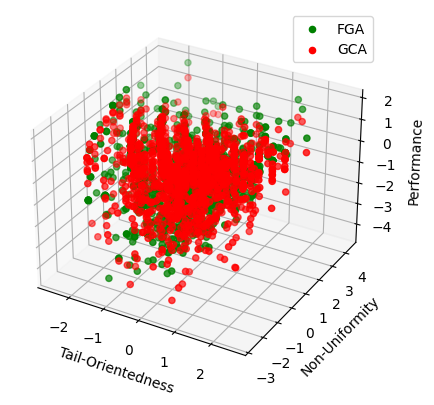

In [25]:

os.makedirs("../analyses/plots", exist_ok=True)

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter3D(df["skew"], df["chi"], df["fga"], color='green',label="FGA")
ax.scatter3D(df["skew"], df["chi"], df["gca"], color='red',label="GCA")
ax.set_xlabel("Tail-Orientedness")
ax.set_ylabel("Non-Uniformity")
ax.set_zlabel("Performance")
plt.legend()
plt.savefig("../analyses/plots/3D_Plot.pdf",format='pdf')

plt.show()


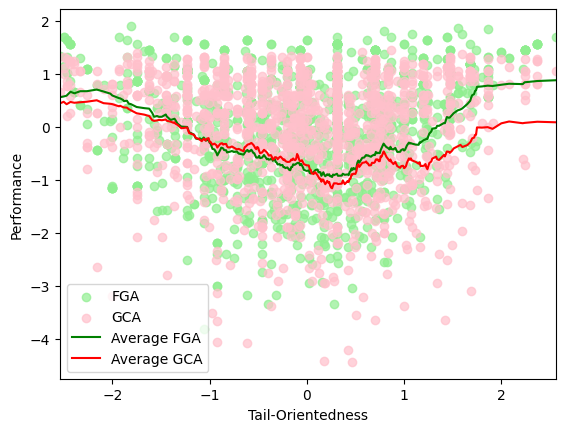

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Set the threshold value for tail orientedness
threshold = -5.0

# Filter the data based on the threshold value
filtered_data = df[df["skew"] > threshold]

fig, ax = plt.subplots()

# Set the color and opacity for scatter plot markers
alpha = 0.7

# Scatter plot with decreased opacity
ax.scatter(filtered_data["skew"], filtered_data["fga"], color="lightgreen", alpha=alpha, label="FGA")
ax.scatter(filtered_data["skew"], filtered_data["gca"], color="pink", alpha=alpha, label="GCA")

# Calculate average values for FGA and GCA separately
avg_fga = filtered_data.groupby("skew")["fga"].mean()
avg_gca = filtered_data.groupby("skew")["gca"].mean()

# Smoothen the average lines using a running average
window_size = 30

# Handle cases where the window size is larger than the available data
avg_fga_smooth = avg_fga.rolling(window_size, center=True, min_periods=1).mean()
avg_gca_smooth = avg_gca.rolling(window_size, center=True, min_periods=1).mean()

# Plot the smoothened average lines
ax.plot(avg_fga_smooth.index, avg_fga_smooth.values, color="green", linestyle="-", label="Average FGA")
ax.plot(avg_gca_smooth.index, avg_gca_smooth.values, color="red", linestyle="-", label="Average GCA")

ax.set_xlim(filtered_data["skew"].min(), filtered_data["skew"].max())  # Set x-axis limits based on filtered data
ax.set_xlabel("Tail-Orientedness")
ax.set_ylabel("Performance")
ax.legend()
plt.savefig("../analyses/plots/Tail_orientedness.pdf", format='pdf')


chi_min: -2.67
chi_max: 4.31


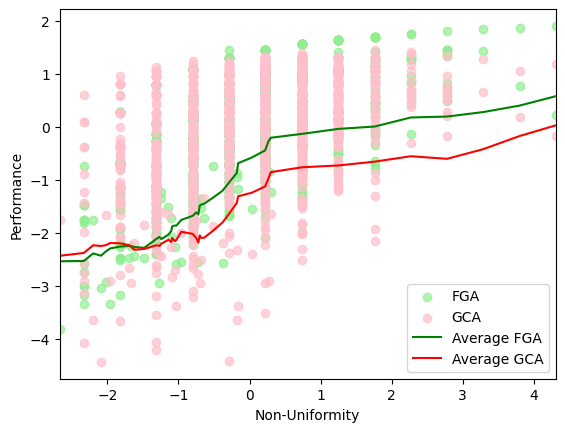

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Set the threshold value for tail orientedness
threshold = -5.0

# Filter the data based on the threshold value
filtered_data = df[df["chi"] > threshold]
fig, ax = plt.subplots()

# Set the color and opacity for scatter plot markers
alpha = 0.7

# Scatter plot with decreased opacity
ax.scatter(filtered_data["chi"], filtered_data["fga"], color="lightgreen", alpha=alpha, label="FGA")
ax.scatter(filtered_data["chi"], filtered_data["gca"], color="pink", alpha=alpha, label="GCA")

# Calculate average values for FGA and GCA separately
avg_fga = filtered_data.groupby("chi")["fga"].mean()
avg_gca = filtered_data.groupby("chi")["gca"].mean()

# Smoothen the average lines using a running average
window_size = 20

# Handle cases where the window size is larger than the available data
avg_fga_smooth = avg_fga.rolling(window_size, center=True, min_periods=1).mean()
avg_gca_smooth = avg_gca.rolling(window_size, center=True, min_periods=1).mean()

# Plot the smoothened average lines
ax.plot(avg_fga_smooth.index, avg_fga_smooth.values, color="green", linestyle="-", label="Average FGA")
ax.plot(avg_gca_smooth.index, avg_gca_smooth.values, color="red", linestyle="-", label="Average GCA")

print(f"chi_min: {filtered_data['chi'].min()}")
print(f"chi_max: {filtered_data['chi'].max()}")

ax.set_xlim(filtered_data["chi"].min(), filtered_data["chi"].max())  # Set x-axis limits based on filtered data
ax.set_xlabel("Non-Uniformity")
ax.set_ylabel("Performance")
ax.legend()
plt.savefig("../analyses/plots/Non_uniformity.pdf", format='pdf')
